In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
!unzip /content/images.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/images/train/angry/15612.jpg  
  inflating: /content/__MACOSX/images/train/angry/._15612.jpg  
  inflating: /content/images/train/angry/29855.jpg  
  inflating: /content/__MACOSX/images/train/angry/._29855.jpg  
  inflating: /content/images/train/angry/20050.jpg  
  inflating: /content/__MACOSX/images/train/angry/._20050.jpg  
  inflating: /content/images/train/angry/22647.jpg  
  inflating: /content/__MACOSX/images/train/angry/._22647.jpg  
  inflating: /content/images/train/angry/1863.jpg  
  inflating: /content/__MACOSX/images/train/angry/._1863.jpg  
  inflating: /content/images/train/angry/22121.jpg  
  inflating: /content/__MACOSX/images/train/angry/._22121.jpg  
  inflating: /content/images/train/angry/27059.jpg  
  inflating: /content/__MACOSX/images/train/angry/._27059.jpg  
  inflating: /content/images/train/angry/16290.jpg  
  inflating: /content/__MACOSX/images/train/angry/._16290.jpg  
  inflating: /c

In [ ]:
train_dir = "images/train"
test_dir = "images/testing"

In [ ]:
def data_frame(dir):
    image_paths = []
    labels = []

    for label in os.listdir(dir):
        label_dir = os.path.join(dir, label)

        if os.path.isdir(label_dir):
            for imagename in os.listdir(label_dir):
                if imagename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff', 'gif')):
                    image_paths.append(os.path.join(label_dir, imagename))
                    labels.append(label)
            print(f"{label} completed")

    return image_paths, labels


In [ ]:
train=pd.DataFrame()
train['image'], train['label']=data_frame(train_dir)

disgust completed
happy completed
neutral completed
sad completed
fear completed
angry completed
surprise completed


In [ ]:
print(train)

                                 image     label
0       images/train/disgust/29630.jpg   disgust
1        images/train/disgust/8628.jpg   disgust
2       images/train/disgust/10236.jpg   disgust
3       images/train/disgust/29732.jpg   disgust
4       images/train/disgust/30252.jpg   disgust
...                                ...       ...
28816   images/train/surprise/3550.jpg  surprise
28817  images/train/surprise/33746.jpg  surprise
28818  images/train/surprise/16682.jpg  surprise
28819   images/train/surprise/6057.jpg  surprise
28820  images/train/surprise/20597.jpg  surprise

[28821 rows x 2 columns]


In [ ]:
test=pd.DataFrame()
test['image'], test['label']=data_frame(test_dir)

disgust completed
happy completed
neutral completed
sad completed
fear completed
angry completed
surprise completed


In [ ]:
print(test['image'])

0        images/testing/disgust/23141.jpg
1          images/testing/disgust/807.jpg
2        images/testing/disgust/25538.jpg
3        images/testing/disgust/28710.jpg
4         images/testing/disgust/7068.jpg
                      ...                
7061    images/testing/surprise/25280.jpg
7062    images/testing/surprise/10306.jpg
7063     images/testing/surprise/7582.jpg
7064    images/testing/surprise/25959.jpg
7065    images/testing/surprise/12684.jpg
Name: image, Length: 7066, dtype: object


In [ ]:
def extract_img_features(images):
    features=[]
    for img in tqdm(images):
        image=load_img(img, color_mode='grayscale')
        image=np.array(image)
        features.append(image)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features


In [ ]:
train_data = extract_img_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [ ]:
test_data=extract_img_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [ ]:
a_train=train_data/255.0
a_test=test_data/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()
LE.fit(train['label'])

LabelEncoder()

In [ ]:
b_train=LE.transform(train['label'])
b_test=LE.transform(test['label'])

In [ ]:
b_train=to_categorical(b_train, num_classes=7)
b_test=to_categorical(b_test, num_classes=7)

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x=a_train, y=b_train, batch_size=128, epochs=100, validation_data = (a_test,b_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - accuracy: 0.2357 - loss: 1.8388 - val_accuracy: 0.2583 - val_loss: 1.8156
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.2515 - loss: 1.8148 - val_accuracy: 0.2610 - val_loss: 1.7872
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.2549 - loss: 1.7879 - val_accuracy: 0.2955 - val_loss: 1.7116
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2960 - loss: 1.7202 - val_accuracy: 0.3524 - val_loss: 1.6057
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.3547 - loss: 1.6261 - val_accuracy: 0.4251 - val_loss: 1.5032
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.4021 - loss: 1.5336 - val_accuracy: 0.4374 - val_loss: 1.4508
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.4285 - loss: 1.4683 - val_accuracy: 0.4902 - val_loss: 1.3347
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.4543 - loss: 1

In [ ]:
model_json=model.to_json()
with open("emodetector.json", 'w') as json_file:
  json_file.write(model_json)
model.save("emodetector.h5")

In [9]:
label=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
from keras.models import model_from_json

In [11]:
from keras.preprocessing.image import load_img

In [12]:
import numpy as np

In [13]:
json_file = open("emodetector.json", "r")
model_json=json_file.read()
json_file.close
model=model_from_json(model_json)
model.load_weights("emodetector.h5")

In [14]:
def mi(image):

    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)

    return feature / 255.0

In [15]:
image='images/train/angry/0.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
Model Prediction is angry


In [16]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Model Prediction is angry


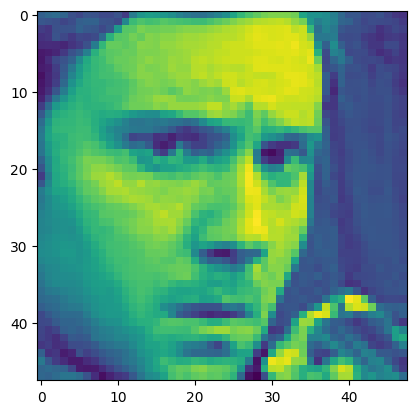

In [21]:
image='images/train/angry/0.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model Prediction is sad


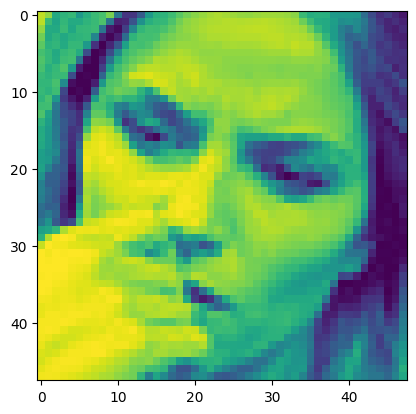

In [22]:
image='images/train/fear/2.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Model Prediction is happy


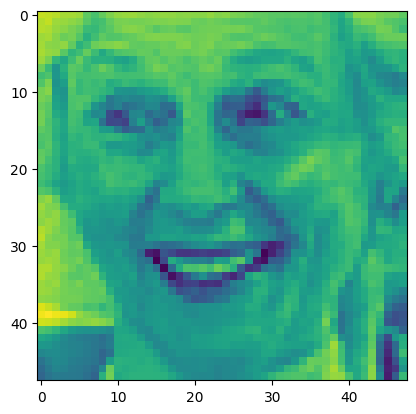

In [26]:
image='images/train/happy/25.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Model Prediction is surprise


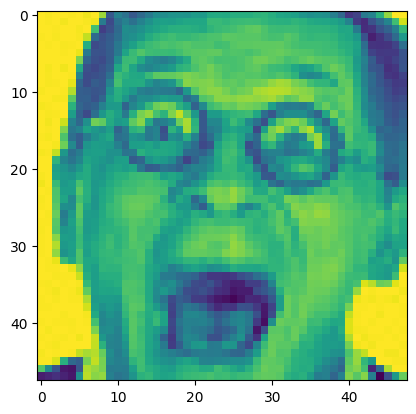

In [25]:
image='images/train/surprise/208.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Model Prediction is neutral


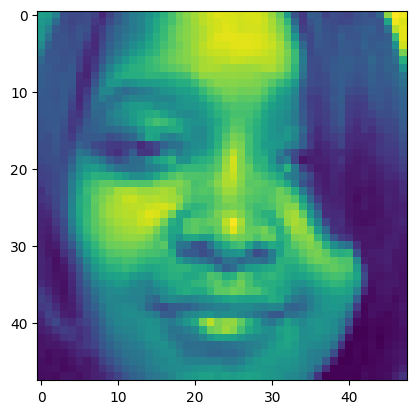

In [27]:
image='images/train/neutral/206.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Model Prediction is disgust


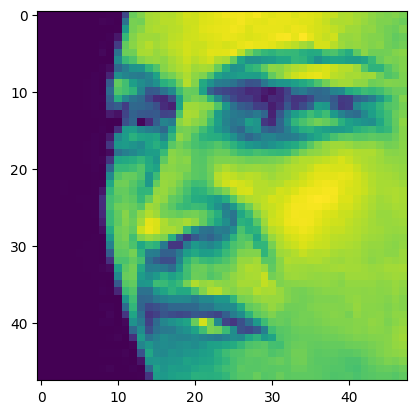

In [29]:
image='images/train/disgust/758.jpg'
img=mi(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print('Model Prediction is', pred_label)
plt.imshow(img.reshape(48,48))